In [2]:
import gmplot
import pandas as pd
import numpy as np
from math import radians, cos, sin, sqrt, atan2, asin
import folium


C:\Users\Toni Isopoussu\AppData\Local\Temp\ipykernel_28112\340489163.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def haversine(lon1, lat1, lon2, lat2):

    

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])  # Muutetaan asteet radiaaneiksi

    dlon = lon2 - lon1  # Lasketaan pituus- ja leveysasteiden erotus
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2  # Lasketaan haversine
    c = 2 * asin(sqrt(a))
    r = 6371  # Maan säde
    return c * r

In [4]:
data = pd.read_csv('mapDataThree.csv',delimiter=';', decimal=',')  # Antaa Pandasin tunnistaa erottimen automaattisesti

data.head()

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites
0,0.093452,64.988464,25.560983,24.721499,42.200001,NaN,NaN,0.005310,37.487000,2.995556,0.0
1,6.237758,64.988417,25.560975,2.300752,19.779297,0.15,184.199997,0.009254,8.515110,21.160181,0.0
2,7.237081,64.988449,25.560939,-14.238337,3.240173,0.75,2.800000,0.010771,9.337894,25.857300,8.0
3,8.237122,64.988459,25.560961,23.511487,40.989990,0.86,153.600006,0.021736,12.866585,32.845139,11.0
4,9.239691,64.988364,25.560901,-13.625436,3.853149,0.00,NaN,0.023949,6.854919,12.665201,12.0


In [5]:

lat = data['Latitude (°)']  # Otetaan latitudi ja longitudi omaan muuttujaan
lon = data['Longitude (°)']

data['dist'] = np.zeros(lat.shape[0])
data['time_diff'] = np.zeros(lat.shape[0])

for i in range(lat.shape[0] - 1):  # Lasketaan etäisyys ja aika
    data['dist'][i] = haversine(lon[i], lat[i], lon[i + 1], lat[i + 1])*1000
    data['time_diff'][i] = data['Time (s)'][i + 1] - data['Time (s)'][i]
    

data['dist'] [0] = 0 # Täytetään NaN arvot nollilla
data['velocity'] = data['dist']/data['time_diff']  # Lasketaan nopeus

data.head()

C:\Users\Toni Isopoussu\AppData\Local\Temp\ipykernel_28112\423055515.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['dist'][i] = haversine(lon[i], lat[i], lon[i + 1], lat[i + 1])*1000
C:\Users\Toni Isopoussu\AppData\Local\Temp\ipyk

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites,dist,time_diff,velocity
0,0.093452,64.988464,25.560983,24.721499,42.200001,NaN,NaN,0.005310,37.487000,2.995556,0.0,0.000000,6.144306,0.000000
1,6.237758,64.988417,25.560975,2.300752,19.779297,0.15,184.199997,0.009254,8.515110,21.160181,0.0,3.943651,0.999323,3.946321
2,7.237081,64.988449,25.560939,-14.238337,3.240173,0.75,2.800000,0.010771,9.337894,25.857300,8.0,1.517254,1.000040,1.517193
3,8.237122,64.988459,25.560961,23.511487,40.989990,0.86,153.600006,0.021736,12.866585,32.845139,11.0,10.964406,1.002570,10.936302
4,9.239691,64.988364,25.560901,-13.625436,3.853149,0.00,NaN,0.023949,6.854919,12.665201,12.0,2.213060,0.449667,4.921551


In [79]:
    # Varmista, että datasi on oikeassa järjestyksessä ja siinä ei ole puuttuvia arvoja
    data_clean = data[['Latitude (°)', 'Longitude (°)']].dropna().reset_index(drop=True)

    # Voit myös harventaa pisteitä ottamalla esimerkiksi joka kymmenennen pisteen
    data_thinned = data_clean.iloc[::10, :]

    # Luodaan uusi kartta
    m = folium.Map(location=[data_thinned['Latitude (°)'].iloc[0], data_thinned['Longitude (°)'].iloc[0]], zoom_start=13)

    # Piirrä harvennettu reitti kartalle
    folium.PolyLine(
        data_thinned.values,
        color='blue'
    ).add_to(m)

    # Tallenna kartta HTML-tiedostona
    m.save('reittikartta.html')
    m  # Jupyter Notebookissa näyttää kartan suoraan notebookissa


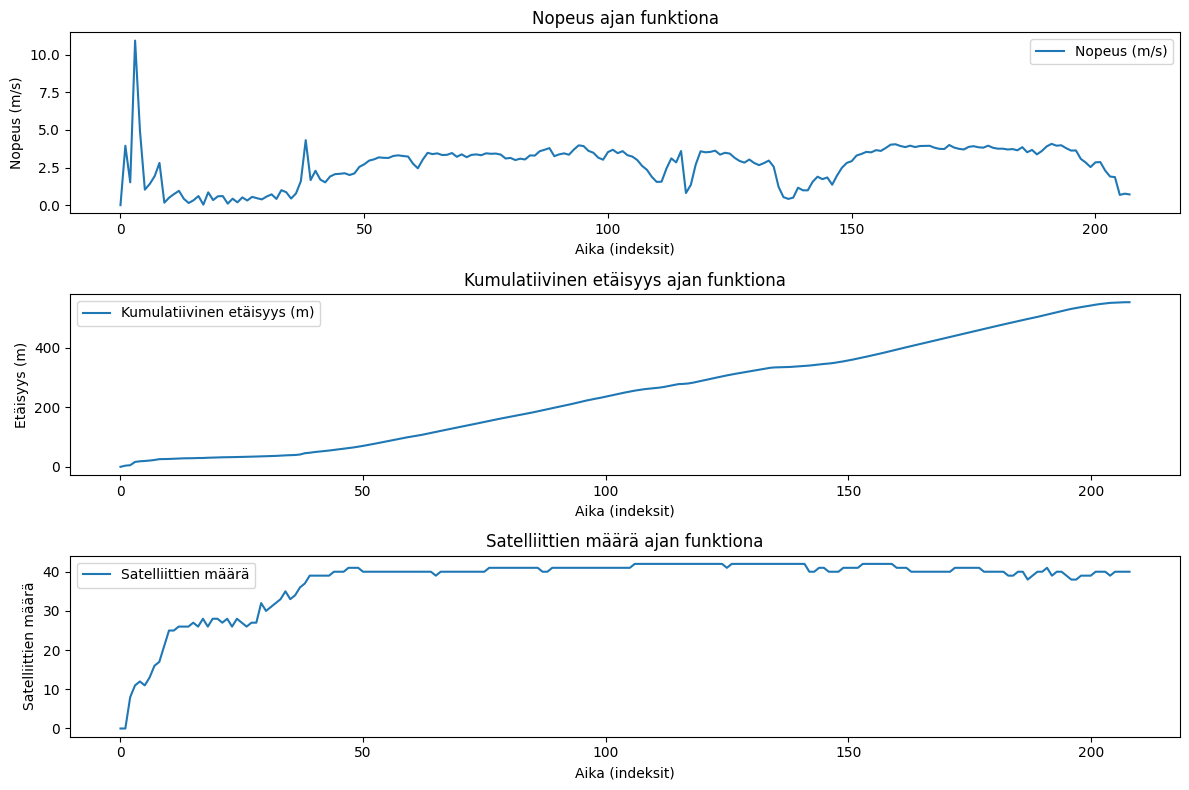

In [80]:
import matplotlib.pyplot as plt

# Kuvaajan piirtäminen
plt.figure(figsize=(12, 8))

# Nopeus
plt.subplot(3, 1, 1)
plt.plot(data['velocity'], label='Nopeus (m/s)')
plt.xlabel('Aika (indeksit)')
plt.ylabel('Nopeus (m/s)')
plt.title('Nopeus ajan funktiona')
plt.legend()

# Etäisyys
plt.subplot(3, 1, 2)
plt.plot(data['dist'].cumsum(), label='Kumulatiivinen etäisyys (m)') # Olettaen että 'dist' on yksittäisen segmentin etäisyys
plt.xlabel('Aika (indeksit)')
plt.ylabel('Etäisyys (m)')
plt.title('Kumulatiivinen etäisyys ajan funktiona')
plt.legend()

# Satelliittien määrä
plt.subplot(3, 1, 3)
plt.plot(data['Satellites'], label='Satelliittien määrä')
plt.xlabel('Aika (indeksit)')
plt.ylabel('Satelliittien määrä')
plt.title('Satelliittien määrä ajan funktiona')
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import folium
from math import radians, cos, sin, sqrt, atan2, asin

# Haversine-kaava etäisyyden laskemiseen kahden pisteen välillä maapallolla
def haversine(lon1, lat1, lon2, lat2):
    # Muunna asteet radiaaneiksi
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # Lasketaan pituus- ja leveysasteiden erotus
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    # Haversine-kaava
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Maapallon säde kilometreinä
    return c * r * 1000 # Palauttaa etäisyyden metreinä

# Lue data
data = pd.read_csv('mapDataThree.csv', delimiter=';', decimal=',')
# Esikäsittely: Lasketaan etäisyys ja aikaero jokaisen peräkkäisen pisteen välillä
data['dist'] = np.zeros(len(data))
data['time_diff'] = np.zeros(len(data))

for i in range(1, len(data)):
    data.at[i, 'dist'] = haversine(data['Longitude (°)'][i-1], data['Latitude (°)'][i-1], 
                                   data['Longitude (°)'][i], data['Latitude (°)'][i])
    data.at[i, 'time_diff'] = data['Time (s)'][i] - data['Time (s)'][i-1]

# Lasketaan nopeus (m/s)
data['velocity'] = data['dist'] / data['time_diff']

# Puhdistetaan data puuttuvista arvoista
data_clean = data.dropna(subset=['Latitude (°)', 'Longitude (°)']).reset_index(drop=True)

# Valinnainen: Harvenna dataa
data_thinned = data_clean.iloc[::10, :]

# Luodaan kartta ensimmäisen pisteen perusteella
m = folium.Map(location=[data_thinned['Latitude (°)'].iloc[0], data_thinned['Longitude (°)'].iloc[0]], zoom_start=13)

# Lisätään reitti kartalle
folium.PolyLine(
    locations=list(zip(data_thinned['Latitude (°)'], data_thinned['Longitude (°)'])),
    color='blue'
).add_to(m)

# Tallennetaan kartta HTML-tiedostoon
m.save('reittikartta.html')

# Tulostetaan kartta, jos käytät Jupyter Notebookia
m